In [1]:
# LIBRERIAS

import numpy as np
import matplotlib.pyplot as plt

In [80]:
# ENTRADA

n_steps = 190    #       [-] - Número de pasos del motor

# PARÁMETROS

# Datos del Motor
torque_mot = 0.7 #      [Nm] - Torque del motor
i_angle_mot = 0  #     [rad] - Ángulo inicial del motor, 0 equivale a la mano extendida
angle_step = 1.8 #     [deg] - Ángulo de un paso del motor
aspeed_mot = 1   # [rad / s] - Velcodiad angular del motor
r_spool = 7      #      [mm] - Radio del carrete

# Datos de las falanges

r_joint = 10 # [mm] - Radio de las articulaciones de las falanges, 
l_prox = 30  # [mm] - Longitud de la falange proximal
l_med = 30   # [mm] - Longitud de la falange medial
l_dist = 20  # [mm] - Longitud de la falange distal
H_L = 3      # [mm] - Distancia entre el plano de la base del dedo con el plano del canal
H_D = 1      # [mm] - Distancia entre el plano del dorso del dedo con el plano del resorte

# Datos de las ligas

k_spring = 196.2; # [-] - Constante elástica de la liga, obtenida experimentalmente


# Datos de eficiencia
mot_eff = 1 # [%] - Eficiencia del motor
F_preload = 4 # [N] - Fuerza que se ejerce entre los lados deslizantes de las articulaciones al hacer contacto
mu_pla = 0.275 # [-] - Coeficiente de fricción del PLA, tomado de: https://revmaterialeplastice.ro/pdf/19%20CHISIU%201%2021.pdf



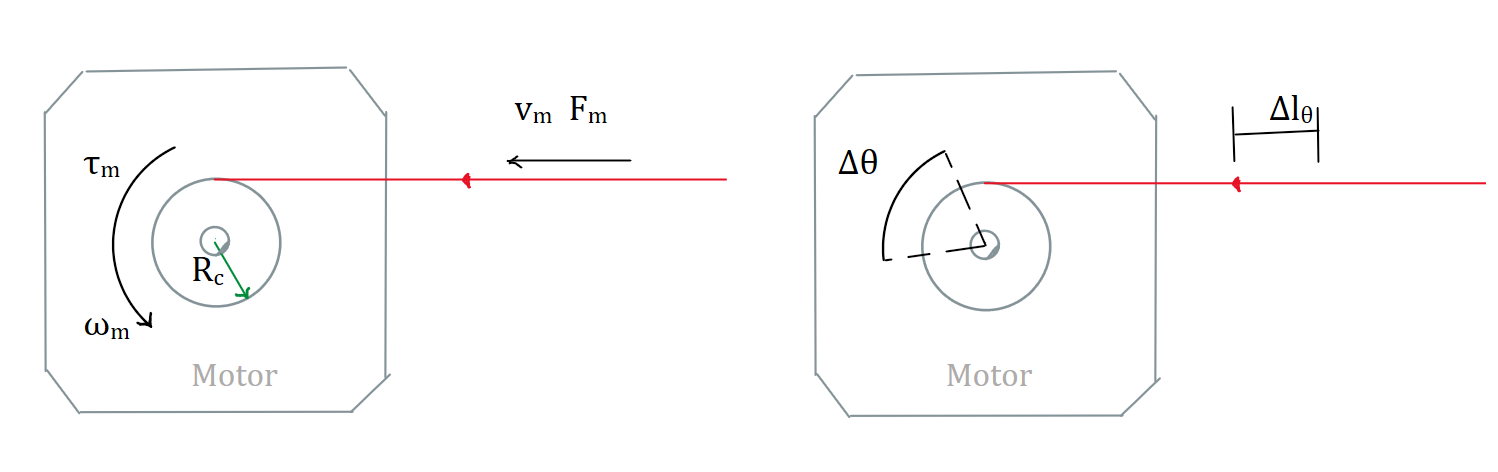

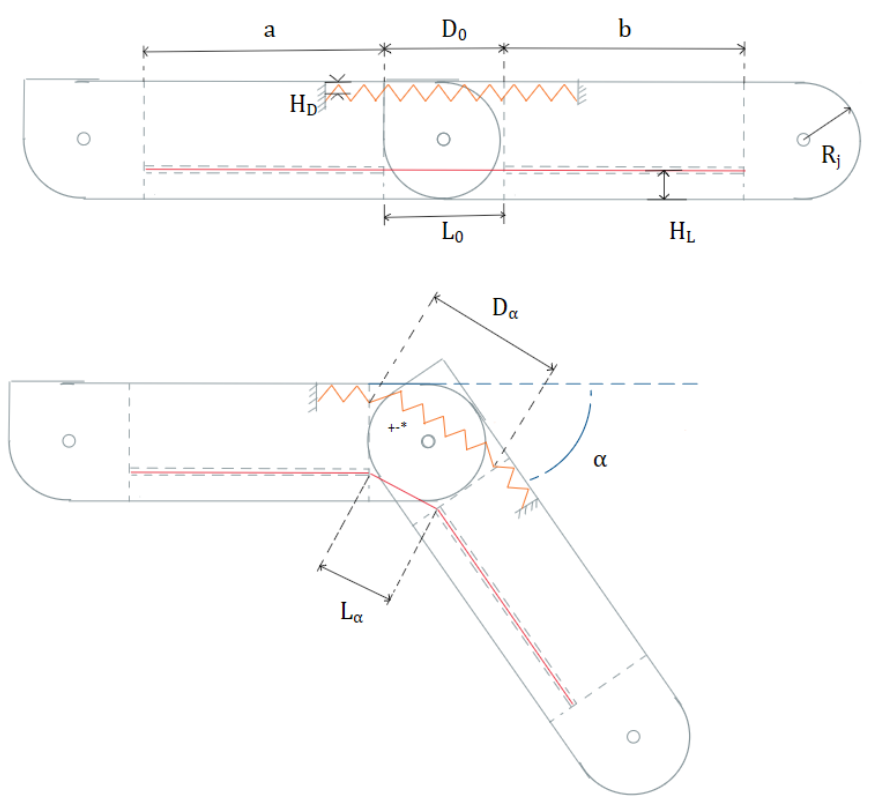

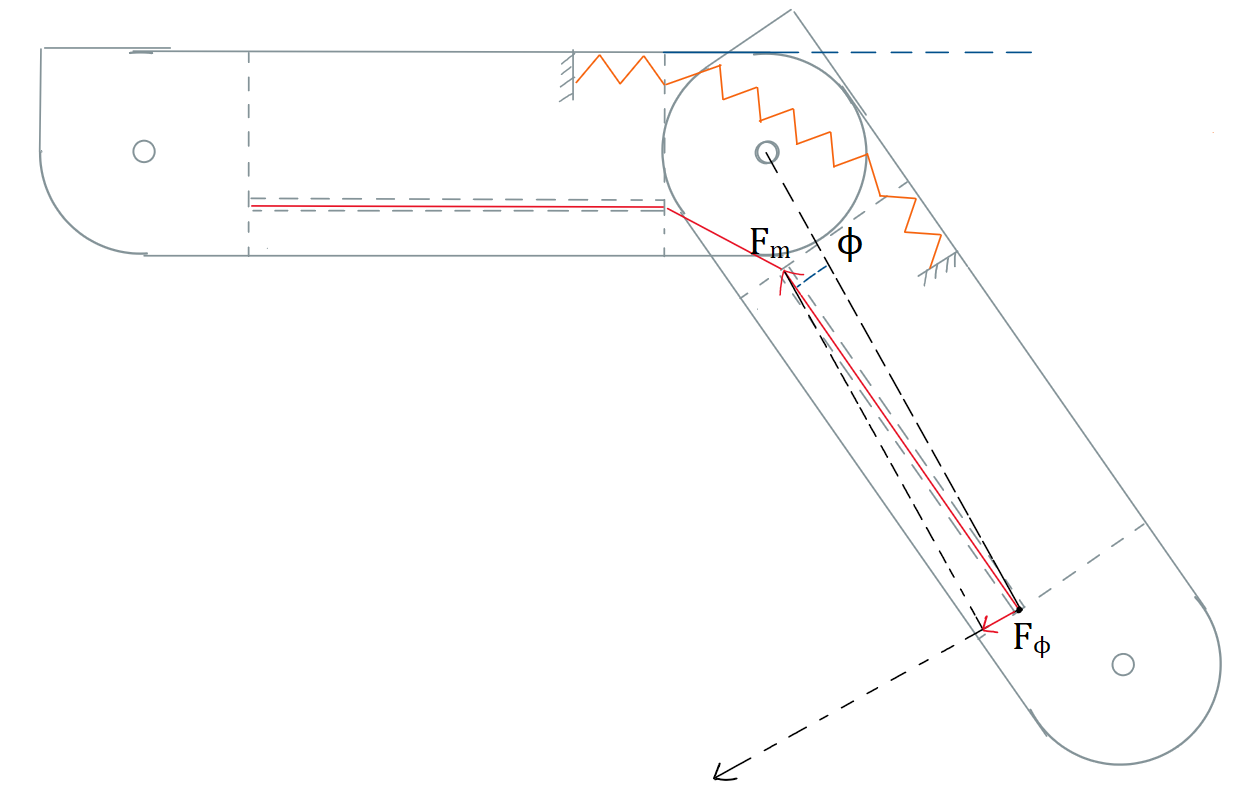

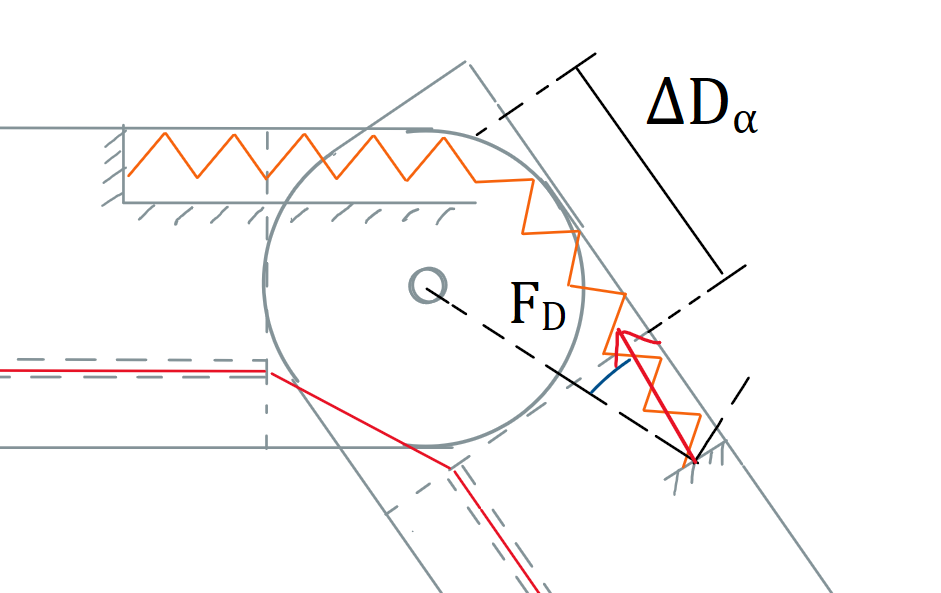

In [81]:
###### CÁLCULOS

# Motor

f_angle_mot = n_steps*np.radians(angle_step) # [rad] - Ángulo final del motor inicial  ([+] contrae, [-] extiende)

# Cable

l_ext = l_prox + l_med + l_dist + 6*r_joint    # [mm] - Longitud del cable completamente extendido
c_carr_rad = np.pi/(4*(r_joint - H_L))         #  [-] - Constante para el cálculo del angulo en radianes
c_carr_deg = 45/(r_joint - H_L)                #  [-] - Constante para el cálculo del angulo en grados
delta_l_th = (f_angle_mot-i_angle_mot)*r_spool # [mm] - Longitud acortada / alargada del cable ([+] contrae, [-] extiende)
# Asumir que cada articulacion se contrae lo mismo:
L_alpha = delta_l_th/3                         # [mm] - Longitud alargada / acortada en cada articulacion ([+] contrae, [-] extiende)
#minmax_range_la = [2*H_L, 2*r_joint]          # [mm] - Valor mínimo y máximo que se puede alargar un cable en una articulación

# Dedos

alpha = L_alpha*c_carr_deg      # [deg] - Angulo de las falanges
len_prox = l_prox + 2*r_joint   #  [mm] - Longitud de la falange proximal (de centro a centro de las articulaciones)
len_med = l_med + 2*r_joint     #  [mm] - Longitud de la falange medial (de centro a centro de las articulaciones)
len_dist = l_dist + r_joint     #  [mm] - Longitud de la falange distal (del centro de la articulación al extremo donde se ata el cable)

# Resorte / Liga
delta_D = (2*r_joint - H_D)*np.sin(np.radians(alpha)) # [mm] - Longitud alargada de la liga

# Fuerzas

F_mot = mot_eff * torque_mot / (r_spool*0.001) # [N] - Fuerza ejercida sobre el cable por el motor
F_fric_preload = F_preload * mu_pla # [N] - Fuerza de fricción sobre los lados deslizantes
F_spring = k_spring * delta_D * 0.001 # [N] - Fuerza ejercida por las ligas

# Falange proximal
d_ref_prox = np.sqrt(pow((r_joint - H_L),2) + pow((l_prox + r_joint),2)) - r_joint # [mm] - Distancia de la linea imaginaria que va del centro de la articulación al punto de anclaje del cable
phi_prox = np.arccos(l_prox/d_ref_prox) # [rad] - Ángulo entre la trayectoria del cable y la linea imaginaria que va del centro de la articulación al punto de anclaje del cable
F_phi_prox = F_mot * np.sin(phi_prox) # [N] - Fuerza ejercida por una falange en dirección tangencial al centro de giro de la articulación
F_n_prox = F_mot/3 * np.cos(phi_prox) # [N] - Fuerza normal (compresión) ejercida en las articulación de falange
F_fric_hinge_prox = F_n_prox * mu_pla # [N] - Fuerza de fricción sobre la visagra en la articulación de la falange
F_prox = F_phi_prox - F_fric_hinge_prox - F_fric_preload - F_spring  # [N] - Fuerza total en la falange
# Falange medial
d_ref_med = np.sqrt(pow((r_joint - H_L),2) + pow((l_med + r_joint),2)) - r_joint # [mm] - Distancia de la linea imaginaria que va del centro de la articulación al punto de anclaje del cable
phi_med = np.arccos(l_med/d_ref_med) # [rad] - Ángulo entre la trayectoria del cable y la linea imaginaria que va del centro de la articulación al punto de anclaje del cable
F_phi_med = F_mot * np.sin(phi_med) # [N] - Fuerza ejercida por una falange en dirección tangencial al centro de giro de la articulación
F_n_med = F_mot/3 * np.cos(phi_med) # [N] - Fuerza normal (compresión) ejercida en las articulación de falange
F_fric_hinge_med = F_n_med * mu_pla # [N] - Fuerza de fricción sobre la visagra en la articulación de la falange
F_med = F_phi_med - F_fric_hinge_med - F_fric_preload - F_spring  # [N] - Fuerza total en la falange
# Falange distal
d_ref_dist = np.sqrt(pow((r_joint - H_L),2) + pow((l_dist + r_joint),2)) - r_joint # [mm] - Distancia de la linea imaginaria que va del centro de la articulación al punto de anclaje del cable
phi_dist = np.arccos(l_dist/d_ref_dist) # [rad] - Ángulo entre la trayectoria del cable y la linea imaginaria que va del centro de la articulación al punto de anclaje del cable
F_phi_dist = F_mot * np.sin(phi_dist) # [N] - Fuerza ejercida por una falange en dirección tangencial al centro de giro de la articulación
F_n_dist = F_mot/3 * np.cos(phi_dist) # [N] - Fuerza normal (compresión) ejercida en las articulación de falange
F_fric_hinge_dist = F_n_dist * mu_pla # [N] - Fuerza de fricción sobre la visagra en la articulación de la falange
F_dist = F_phi_dist - F_fric_hinge_dist - F_fric_preload - F_spring  # [N] - Fuerza total en la falange
# Dedo
F_total = F_prox + F_med + F_dist # [N] - Fuerza teórica de un dedo

# Coordenadas

joints_xpoints_0 = np.zeros((4,)) # [mm] - Coordenadas x de las articulaciones antes de la acción del motor
joints_ypoints_0 = np.zeros((4,)) # [mm] - Coordenadas y de las articulaciones antes de la acción del motor
joints_ypoints_0[1] = joints_ypoints_0[0] + len_prox
joints_ypoints_0[2] = joints_ypoints_0[1] + len_med
joints_ypoints_0[3] = joints_ypoints_0[2] + len_dist

joints_xpoints = np.zeros((4,)) # [mm] - Coordenadas x de las articulaciones después de la acción del motor
joints_ypoints = np.zeros((4,)) # [mm] - Coordenadas y de las articulaciones después de la acción del motor

palm_xpoints = np.zeros((2,)) # [mm] - Coordenadas x de la palma
palm_ypoints = np.zeros((2,)) # [mm] - Coordenadas y de la palma

ay_sz = l_prox + l_med + l_dist + 6*r_joint # [mm] - Longitud de un dedo extendido

palm_ypoints[1] = -ay_sz; 

if n_steps > 0:
    angle_delta1 = (np.pi/2) - np.radians(alpha)   # [rad] - Ángulo de la primera falange respecto a la palma
    angle_delta2 = (np.pi/2) - np.radians(2*alpha) # [rad] - Ángulo de la segunda falange respecto a la palma
    angle_delta3 = (np.pi/2) - np.radians(3*alpha) # [rad] - Ángulo de la tercera falange respecto a la palma
    
    # print(angle_delta1)
    # print(angle_delta2)
    # print(angle_delta3)
    
    joints_xpoints[1] = joints_xpoints[0] + len_prox*np.cos(angle_delta1)
    joints_ypoints[1] = joints_ypoints[0] + len_prox*np.sin(angle_delta1)

    joints_xpoints[2] = joints_xpoints[1] + len_med*np.cos(angle_delta2)
    joints_ypoints[2] = joints_ypoints[1] + len_med*np.sin(angle_delta2)

    joints_xpoints[3] = joints_xpoints[2] + len_dist*np.cos(angle_delta3)
    joints_ypoints[3] = joints_ypoints[2] + len_dist*np.sin(angle_delta3)
    
    # print(joints_xpoints)
    # print(joints_ypoints)
    
else:
    joints_ypoints[1] = joints_ypoints[0] + len_prox
    joints_ypoints[2] = joints_ypoints[1] + len_med
    joints_ypoints[3] = joints_ypoints[2] + len_dist

print("************************************************************************")
print("")
print("Alpha: ")
print(alpha)

print("")
print("************************************************************************")
print("")

print("Fuerza [N]")

print("")

print("Fuerza de fricción de superficies deslizantes para cada articulación: ")
print(-F_fric_preload)
print("Fuerza de cada resorte o liga: ")
print(-F_spring)

print("")

print("Fuerza falange PROXIMAL: ")
print(F_prox)
print("Fuerza en la falange sin pérdidas: ")
print(F_phi_prox)
print("Fuerza de fricción en la visagra: ")
print(-F_fric_hinge_prox)

print("")

print("Fuerza falange MEDIAL: ")
print(F_med)
print("Fuerza en la falange sin pérdidas: ")
print(F_phi_med)
print("Fuerza de fricción en la visagra: ")
print(-F_fric_hinge_med)

print("")

print("Fuerza falange DISTAL: ")
print(F_dist)
print("Fuerza en la falange sin pérdidas: ")
print(F_phi_dist)
print("Fuerza de fricción en la visagra: ")
print(-F_fric_hinge_dist)

print("")
print("-----------------------------")
print("Fuerza total de un dedo [N]: ")
print(F_total)
print("-----------------------------")
print("")
print("************************************************************************")
print("")
print(phi_prox)
print(phi_dist)
print("")
print(F_n_prox)


************************************************************************

Alpha: 
89.53539062730913

************************************************************************

Fuerza [N]

Fuerza de fricción de superficies deslizantes para cada articulación: 
-1.1
Fuerza de cada resorte o liga: 
-3.727677439394712

Fuerza falange PROXIMAL: 
6.01852391404705
Fuerza en la falange sin pérdidas: 
19.83081547696392
Fuerza de fricción en la visagra: 
-8.984614123522158

Fuerza falange MEDIAL: 
6.01852391404705
Fuerza en la falange sin pérdidas: 
19.83081547696392
Fuerza de fricción en la visagra: 
-8.984614123522158

Fuerza falange DISTAL: 
13.922092869556112
Fuerza en la falange sin pérdidas: 
27.561397313593268
Fuerza de fricción en la visagra: 
-8.811627004642443

-----------------------------
Fuerza total de un dedo [N]: 
25.959140697650213
-----------------------------

************************************************************************

0.1996314918268963
0.2792283554140017

32.6713

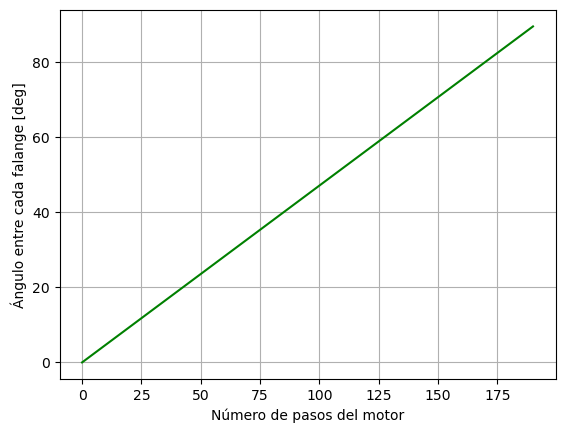

In [90]:
# GRÁFICA - Pasos del motor vs ángulo entre falanges

if n_steps>0:
    x_steps = np.linspace(0,n_steps,abs(n_steps)+1)                              #   [-] - Número de pasos del motor
    y_angle = (((x*np.radians(angle_step)) - i_angle_mot)*r_spool/3)*c_carr_deg # [deg] - Ángulo entre cada falange
    plt.plot(x_steps,y_angle, color='green')
    plt.xlabel('Número de pasos del motor')
    plt.ylabel('Ángulo entre cada falange [deg]')
    plt.grid()

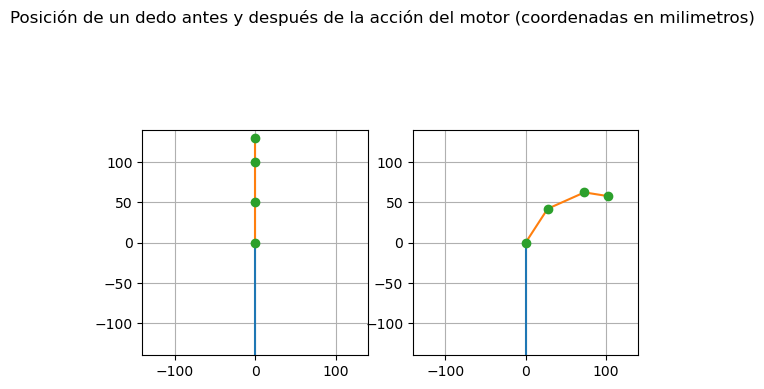

In [79]:
# GRÁFICA - Posición de un dedo

fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Posición de un dedo antes y después de la acción del motor (coordenadas en milimetros)')

ax1.plot(palm_xpoints,palm_ypoints)
ax1.plot(joints_xpoints_0,joints_ypoints_0)
ax1.plot(joints_xpoints_0,joints_ypoints_0,'o')
ax1.set_xlim(-ay_sz,ay_sz)
ax1.set_ylim(-ay_sz,ay_sz)
ax1.set_box_aspect(1)
ax1.grid()

ax2.plot(palm_xpoints,palm_ypoints)
ax2.plot(joints_xpoints,joints_ypoints)
ax2.plot(joints_xpoints,joints_ypoints,'o')
ax2.set_xlim(-ay_sz,ay_sz)
ax2.set_ylim(-ay_sz,ay_sz)
ax2.set_box_aspect(1)
ax2.grid()


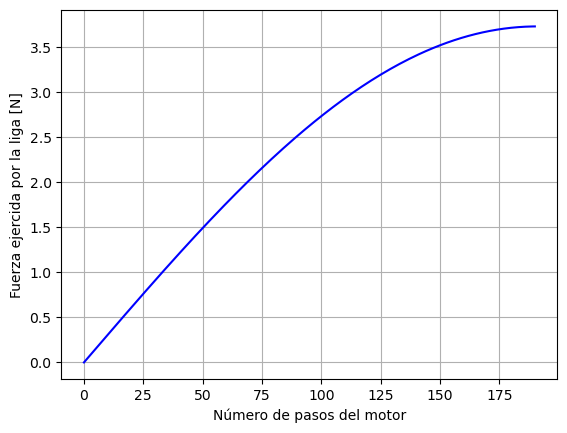

In [89]:
if n_steps > 0:
    c_spring = (2*r_joint - H_D) * k_spring * 0.001
    # x = np.linspace(0,n_steps,abs(n_steps)+1)
    y_Fspring = np.sin(np.radians(np.absolute(y_angle))) * c_spring
    plt.plot(x_steps,y_Fspring, color='blue')
    plt.xlabel('Número de pasos del motor')
    plt.ylabel('Fuerza ejercida por la liga [N]')
    plt.grid()